# Set the NOMAD Upload id
- Use the doi to find the nomad dataset
- go to the entry page
- copy the Uplaod id and paste it here

In [4]:
upload_id = ''

## **Advanced Data Visualization using hdf5 datafiles from Institut Néel**
- Version: 1.0.2 <br>
- Author: William Rigaut <br>
- Date: 26.06.2025  <br>
- Package developped at Institut Néel to visualize and manipulate the data with python commands. A tool (DaHU) to quickly visualize the data is already available at https://github.com/Combinatorials-Neel/DaHU. This Notebook will allow you to customize plots with much less restrictions but needs basic python knowledge.

### **1. Introduction**

<p>An <b>HDF5</b> datafile compiled from high-throughput experiments at Institut Néel contains different measurement scans for each point in a 2D-grid over a thin film deposited on a 100mm substrate. This 2D-grid contains a point every 5mm centered around the center of the wafer itself, by considering the circular shape of the substrate one datafile contains 249 scans for each main characterization technique.</p>

<p>At each position, four main characterization techniques can be performed: <p>

- <b>Energy Dispersive X-ray spectroscopy (EDX)</b> where element composition can be determined using a scanning electron microscope.

- <b>Scanning Magneto Optics Kerr Effect (MOKE)</b> where the coercive field on the surface of a magnetic thin film can be obtained by a fast optical measurement under a pulsed magnetic field.

- <b>X-Ray Diffraction (XRD)</b> where structural properties can be determined (Phases and lattice parameters) using either a automated laboratory diffractometer or synchrotron radiation.

- <b>Profilometry (DEKTAK)</b>  is also used to estimate magnetic film thickness at every position with a calibration experiment using a patterned substrate. This technique is new and it has not been applied to older datasets. Profilometry data will be added in a futur version of the package and is currently not supported.

The HDF5 file structure is defined using a standard very similar to the <b>NeXuS hdf5 file format</b> used in synchrotron facilities (https://www.nexusformat.org/).

<span style="color: red;">Disclamer: The Notebook was written as an example for a specific dataset and the example code will have to be slightly adapted for other datasets.</span>

### **2. Read and display data from hdf5 file using a GUI**

Before starting, you can download the example dataset [here](https://drive.google.com/drive/folders/1SQeCeuoVnfZD1pjYhtj-ZBLcgDnFYLYJ?usp=sharing). This file contains a full dataset for the (NdCe)FeB system.

A first overview of the HDF5 datafile can be done using a graphical user interface (GUI) program such as:
- `pyMca` http://www.silx.org/doc/PyMca/dev/install.html
- `hdf5view` https://pypi.org/project/hdf5view/

<p>Without GUI, the python module <b>h5py</b>, which is actually used by the reader can also be considered.</p>

<p>Here is an example with the PyMca software:</p>

![HDF5 file display using PyMca software](examples/Figure_1-PyMca.png)

Inside this hdf5 datafile example (NdCeFeB) you will be able to find at most 5 groups:
- `sample` containing basic sample info such as layer structure, deposition date, operator, ect...
- `NdCeFeB_1-1_EDX` containing all EDX scans at each wafer position.
- `NdCeFeB_2-5_ESRF` containing all XRD scans at each wafer position.
- `NdCeFeB_2-5_MOKE` containing all MOKE scans at each wafer position.

These group will be reviewed in more details using the reader itself, but feel free to explore the dataset on your own and please if you have any suggestions.

First, you need to install all the required packages using the following command:

### **3. Using the hdf5 reader from Institut Néel**

##### **3.1 Default xarray full dataset**

A built-in module has been written to parse the full hdf5 file, it will read all the data along with the attributs associated to each dataset and convert it to an xarray.Dataset object. 

From the xarrays you will be able to manipulate and plot the data as your convenience.

First, you can import the `read_hdf5` functions along the `pathlib` python library to use path that are OS independant.

In [5]:
import packages.readers.read_hdf5 as read_hdf5
import pathlib
import zipfile

Then you simply need to specify the path to your HDF5 datafile using the following command: 

In [8]:
import requests
from io import BytesIO
from tqdm.notebook import tqdm
#url = f'https://nomad-lab.eu/prod/v1/api/v1/uploads/{upload_id}/raw/NdCeFeB_2-5.hdf5'
url = 'https://keeper.mpdl.mpg.de/f/009787a7419949159983/?dl=1'
response = requests.get(url, stream=True)
total_size = int(response.headers.get('content-length', 0))
chunk_size = 1024
with open("NdCeFeB_2-5.hdf5.zip", 'wb') as fd:
  with tqdm(total=total_size, unit='B', unit_scale=True, desc="Downloading", ncols=180) as pbar:
    for chunk in response.iter_content(chunk_size=chunk_size):
        fd.write(chunk)
        pbar.update(len(chunk))
with zipfile.ZipFile("NdCeFeB_2-5.hdf5.zip", 'r') as zip_ref:
    zip_ref.extractall('.')

Downloading:   0%|                                                                                            …

In [16]:
HDF5_path = pathlib.Path("NdCeFeB_2-5.hdf5")

The package `read_hdf5` includes a function `get_full_dataset()` that will read inside the HDF5 file to retrieve results from <b>EDX</b>, <b>MOKE</b> and <b>XRD</b> for every position using an xarray.

You can call it by using the following:


In [17]:
data = read_hdf5.get_full_dataset(HDF5_path)
data # To display the xarray in the notebook

<xarray.Dataset> Size: 19kB
Dimensions:            (y: 17, x: 17)
Coordinates:
  * y                  (y) float64 136B -40.0 -35.0 -30.0 ... 30.0 35.0 40.0
  * x                  (x) float64 136B -40.0 -35.0 -30.0 ... 30.0 35.0 40.0
Data variables:
    Ce Composition     (y, x) float64 2kB nan nan nan nan ... nan nan nan nan
    Fe Composition     (y, x) float64 2kB nan nan nan nan ... nan nan nan nan
    Nd Composition     (y, x) float64 2kB nan nan nan nan ... nan nan nan nan
    coercivity_dmdh    (y, x) float64 2kB nan nan nan nan ... nan nan nan nan
    coercivity_m0      (y, x) float64 2kB nan nan nan nan ... nan nan nan nan
    intercept_field    (y, x) float64 2kB nan nan nan nan ... nan nan nan nan
    max_kerr_rotation  (y, x) float64 2kB nan nan nan nan ... nan nan nan nan
    reflectivity       (y, x) float64 2kB nan nan nan nan ... nan nan nan nan

 An interactive widget will allow you to see the content of the dataset. Currently this function returns an xarray.Dataset object with Coordinates (x,y) and the Data variables are :
 
 - `A_i Composition` (in at.%) is the compofrsition of A_i from EDX quantification.
 
 - `coercivity_dmdh` is the derivate coercivity dM/dH.
 - `coercivity_m0` (in T) is the coercivity when M = 0.
 - `intercept_field` (in T) is the intercept field.
 - `max_kerr_rotation` (in °) is the maximum signal from MOKE.
 - `reflectivity` (in V) is the MOKE reflectivity.
 - `P_i Phase Fraction` (in wt.%) is the weight phase fraction of P_i from XRD.
 - `(P_i)_j Lattice Parameter j` (in nm) is the lattice parameter j of the phase P_i obtained from XRD.

 Since the coordinate matrix is a 80x80mm square and the wafer sample is shape like a disk, some points are actually outside the wafer and does not have any values associated and are set to np.nan values instead.

If you are only interested in one data variable, for example `Coercivity`, you can simply select this data with:

In [18]:
coercivity = data["coercivity_m0"] # Data variables can be selected using the dictionary syntax in python
coercivity

<xarray.DataArray 'coercivity_m0' (y: 17, x: 17)> Size: 2kB
array([[       nan,        nan,        nan,        nan,        nan,
               nan, 0.96913695, 0.95205417, 0.96472983, 0.89947314,
        0.91803719,        nan,        nan,        nan,        nan,
               nan,        nan],
       [       nan,        nan,        nan,        nan, 0.98579869,
        1.10024586, 1.10038818, 1.14193662, 1.13094993, 1.1024602 ,
        1.07321564, 0.9678673 , 0.89146956,        nan,        nan,
               nan,        nan],
       [       nan,        nan,        nan, 1.03820369, 1.22565969,
        1.22300228, 1.22582148, 1.23118696, 1.19290564, 1.1814936 ,
        1.14524371, 1.07648863, 0.97475432, 0.87632319,        nan,
               nan,        nan],
       [       nan,        nan, 1.07964113, 1.21728488, 1.31748277,
        1.29480716, 1.31611217, 1.34536573, 1.29663224, 1.22682958,
        1.15423914, 1.13546583, 0.96658051, 0.90159016, 0.807543  ,
               nan,        nan],
       [       nan, 1.09867619, 1.19232261, 1.27004007, 1.31438301,
        1.33355087, 1.31702225, 1.33653521, 1.24976845, 1.24017258,
        1.25607054, 1.21367603, 1.03050507, 1.01331295, 0.90411888,
        0.72213746,        nan],
...
       [       nan, 1.04814462, 1.16318003, 1.27171536, 1.32457592,
        1.2939267 , 1.23831862, 1.2314011 , 1.18336951, 1.12070018,
        1.09763259, 1.0324293 , 0.93603455, 0.79623389, 0.6137116 ,
        0.56730624,        nan],
       [       nan,        nan, 1.01891793, 1.12155329, 1.1835854 ,
        1.24764574, 1.2005949 , 1.18039188, 1.21098624, 1.11864542,
        1.06633962, 0.9009874 , 0.74379206, 0.67564948, 0.60658843,
               nan,        nan],
       [       nan,        nan,        nan, 0.96373141, 1.09331763,
        1.1232167 , 1.14066747, 1.11473475, 1.07770266, 0.97368773,
        0.85287587, 0.72344807, 0.68305871, 0.61190775,        nan,
               nan,        nan],
       [       nan,        nan,        nan,        nan, 0.83300906,
        0.88080454, 0.89391547, 0.94647286, 0.87446944, 0.80616986,
        0.67102734, 0.61474932, 0.60731742,        nan,        nan,
               nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan, 0.67190751, 0.68249469, 0.6320131 , 0.56544256,
        0.54054832,        nan,        nan,        nan,        nan,
               nan,        nan]])
Coordinates:
  * y        (y) float64 136B -40.0 -35.0 -30.0 -25.0 ... 25.0 30.0 35.0 40.0
  * x        (x) float64 136B -40.0 -35.0 -30.0 -25.0 ... 25.0 30.0 35.0 40.0
Attributes:
    units:    T

Then if you want to only select a specific value for coercivity you can use the following:

In [19]:
coercivity.sel(x=5, y=5)

<xarray.DataArray 'coercivity_m0' ()> Size: 8B
array(1.26493399)
Coordinates:
    y        float64 8B 5.0
    x        float64 8B 5.0
Attributes:
    units:    T

In [20]:
# If needed you can convert from T to A/m using:
mu0 = 4 * 3.141592653589793 * 1e-7  # Vacuum permeability in T/(A/m)
Hc_in_T = coercivity.sel(x=5, y=5)  # coercivity in T
# Hc_in_T = 1.2  # coercivity in T
Hc_in_APerm = Hc_in_T/mu0
Hc_in_APerm.attrs['units'] = "A/m"
Hc_in_APerm

<xarray.DataArray 'coercivity_m0' ()> Size: 8B
array(1006602.48551952)
Coordinates:
    y        float64 8B 5.0
    x        float64 8B 5.0
Attributes:
    units:    A/m

- To better visualize the data, you can plot the data in a 2D heatmap using `plot()` directly on the xarray. However for better consistancy with DaHU we choose to use the `plotly` library instead.

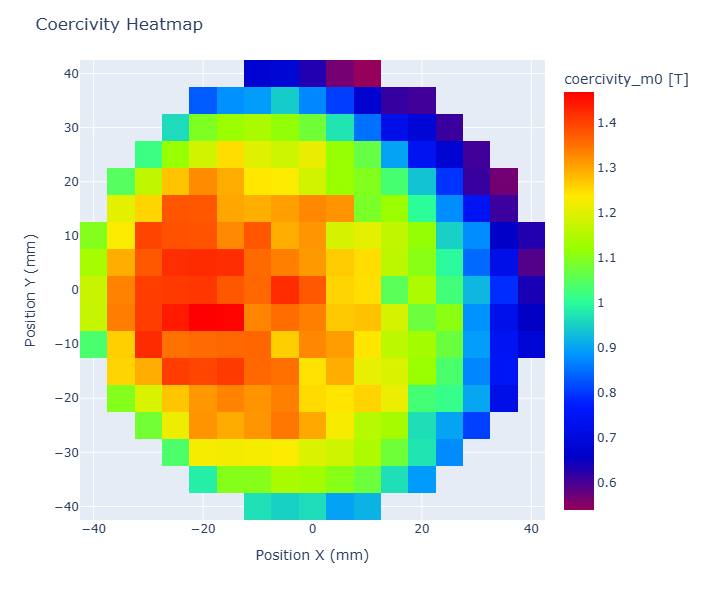

In [21]:
# Heatmap plot
import plotly.express as px

coercivity = data["coercivity_m0"] # Getting all the coercivity values

fig = px.imshow(coercivity, color_continuous_scale='rainbow') # using imshow from plotly
fig.update_layout(title="Coercivity Heatmap", xaxis_title="Position X (mm)", yaxis_title="Position Y (mm)", width=700, height=600) # Adding title, labels and figure 
fig.update_yaxes(autorange=True) # To have the y axis from -40 to 40
fig.show()

You can also select subsets with the `sel()` function by specifiying in argument which values of x and y you need. For more advanced xarray operations you can directly check https://docs.xarray.dev/en/stable/getting-started-guide/quick-overview.html

The following examples include a line selection for Nd composition.

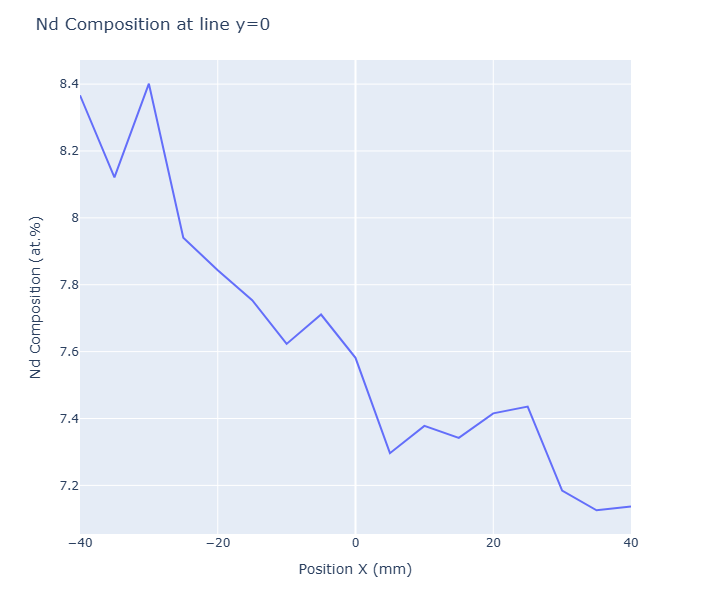

In [22]:
# Line x=0 selected for Nd composition
import plotly.express as px

composition_Nd = data["Nd Composition"] # Nd composition data variable
line_composition = composition_Nd.sel(y=0) # Selecting the line y=0
coordinates = line_composition.coords["x"] # Change .coords["x"] to .coords["y"] if you plot at x fixed

fig = px.line(x=coordinates, y=line_composition, width=800, height=600) 
fig.update_layout(title="Nd Composition at line y=0", xaxis_title="Position X (mm)", yaxis_title="Nd Composition (at.%)")

fig.show()

<span style="color: red;">Disclamer: For the cells below, analysis data from X-ray are required, but these are not included in the present data set. This is why the cells were turned to 'raw'-mode.</span>

Another example is a ternary plot for Nd, Ce and Fe composition vs coercivity. Here we are also using `pandas` so the data is reshaped to a 1D array first. You can then zoom on the plot with plotly using the zoom button on the top right corner of the figure.

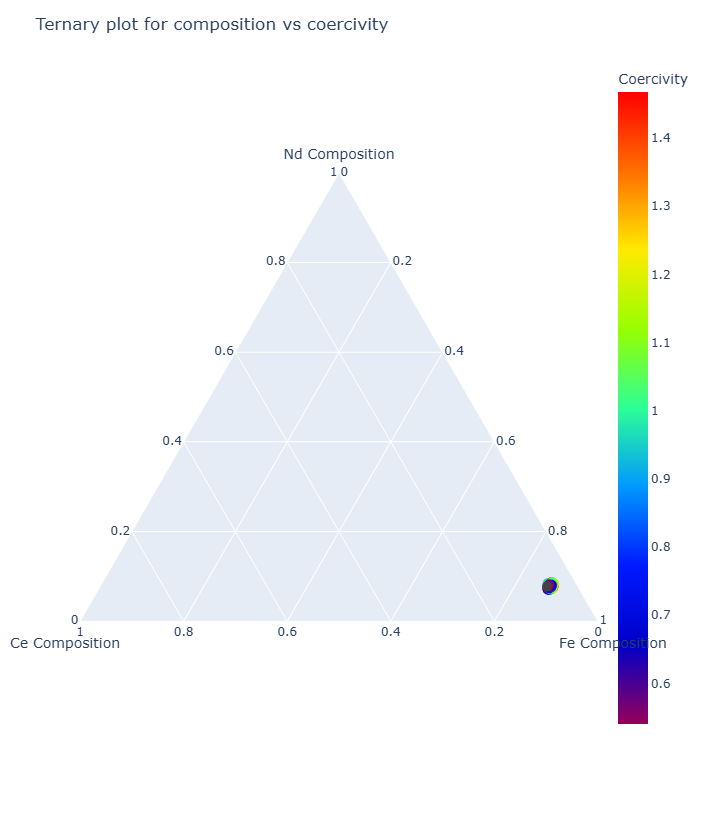

In [23]:
# Ternary plot
import plotly.express as px
import pandas as pd

# Rescaling of the composition to at.%
Nd = (data["Nd Composition"].values*100).reshape(-1)
Ce = (data["Ce Composition"].values*100).reshape(-1)
Fe = (data["Fe Composition"].values*100).reshape(-1)
coercivity = data["coercivity_m0"].values.reshape(-1)
# Creating the dataframe from the data
df = pd.DataFrame({"Nd Composition": Nd, "Ce Composition": Ce, "Fe Composition": Fe, "Coercivity": coercivity})

fig = px.scatter_ternary(df, a='Nd Composition', b='Ce Composition', c='Fe Composition', color='Coercivity', color_continuous_scale='rainbow') # Using scatter_ternary from plotly
fig.update_layout(title="Ternary plot for composition vs coercivity", width=1000, height=800)
fig.update_traces(marker={'size': 10})

fig.show()

##### **3.2 Getting xarray datasets containing measurement data**

If you need to work with the measurement readout instead, the function `get_measurement_data()` will return an xarray DataTree object containing all the scans of every experiment.

In [24]:
import packages.readers.read_hdf5 as read_hdf5
import pathlib
#HDF5_path = pathlib.Path("/Users/williamrigaut/Desktop/combinatorials/combinatorials-data/NdCeFeB/NdCeFeB_2-5.hdf5")

all_scans = read_hdf5.get_measurement_data(HDF5_path, datatype="all")

Reading EDX
Reading MOKE
Reading XRD
Modified dataset found for XRD
Important: A filter was applied to integrate the data to filter out signal from the sample holder (Al-cubic signal).
The method used was medfilt1d_ng() from the pyFAI python package (https://pyfai.readthedocs.io/en/stable/usage/tutorial/AzimuthalFilter.html) with the following arguments: method=["full", "csr", "cython"], percentile=(40,60), polarization_factor=0.99.
The filtering is not perfect and some artefacts sill remain after filtering. This data will be parsed into the xarray instead of the unfiltered data.


In [25]:
all_scans # You can visualize its content in the notebook by calling the variable

<xarray.DataTree 'Measurement Data'>
Group: /
├── Group: /EDX
│       Dimensions:  (y: 17, x: 17, counts: 4096, energy: 4096)
│       Coordinates:
│         * y        (y) float64 136B -40.0 -35.0 -30.0 -25.0 ... 25.0 30.0 35.0 40.0
│         * x        (x) float64 136B -40.0 -35.0 -30.0 -25.0 ... 25.0 30.0 35.0 40.0
│           counts   (y, x, counts) float64 9MB nan nan nan nan nan ... nan nan nan nan
│           energy   (y, x, energy) float64 9MB nan nan nan nan nan ... nan nan nan nan
├── Group: /MOKE
│       Dimensions:           (y: 17, x: 17, integrated_pulse: 2004,
│                              magnetization: 2004, pulse: 2004, reflectivity: 2004)
│       Coordinates:
│         * y                 (y) float64 136B -40.0 -35.0 -30.0 ... 30.0 35.0 40.0
│         * x                 (x) float64 136B -40.0 -35.0 -30.0 ... 30.0 35.0 40.0
│           integrated_pulse  (y, x, integrated_pulse) float64 5MB nan nan ... nan nan
│           magnetization     (y, x, magnetization) float64 5MB nan nan nan ... nan nan
│           pulse             (y, x, pulse) float64 5MB nan nan nan nan ... nan nan nan
│           reflectivity      (y, x, reflectivity) float64 5MB nan nan nan ... nan nan
└── Group: /XRD
        Dimensions:    (y: 17, x: 17, intensity: 2986, angle: 2986)
        Coordinates:
          * y          (y) float64 136B -40.0 -35.0 -30.0 -25.0 ... 25.0 30.0 35.0 40.0
          * x          (x) float64 136B -40.0 -35.0 -30.0 -25.0 ... 25.0 30.0 35.0 40.0
            intensity  (y, x, intensity) float64 7MB nan nan nan nan ... nan nan nan nan
            angle      (y, x, angle) float64 7MB nan nan nan nan nan ... nan nan nan nan

Before plotting, you need to select which dataset you want to plot as a function of another one, as an example :

In [26]:
# 1D pattern
import plotly.express as px

# Getting the angle and the intensity of the XRD pattern
angle = all_scans["XRD"]["angle"].sel(x=-15, y=-30)
intensity = all_scans["XRD"]["intensity"].sel(x=-15, y=-30)

fig = px.line(x=angle, y=intensity, width=800, height=600)
fig.update_layout(title="XRD Pattern at position x=-15, y=-30", xaxis_title="Two Theta (°)", yaxis_title="Intensity (a.u.)")

fig.show()

One beautiful way to look at XRD patterns is with a waterfall plot. Here you select a line and you plot an image with the intensity on the color scale, the angle on the x axis and the position on the y axis.

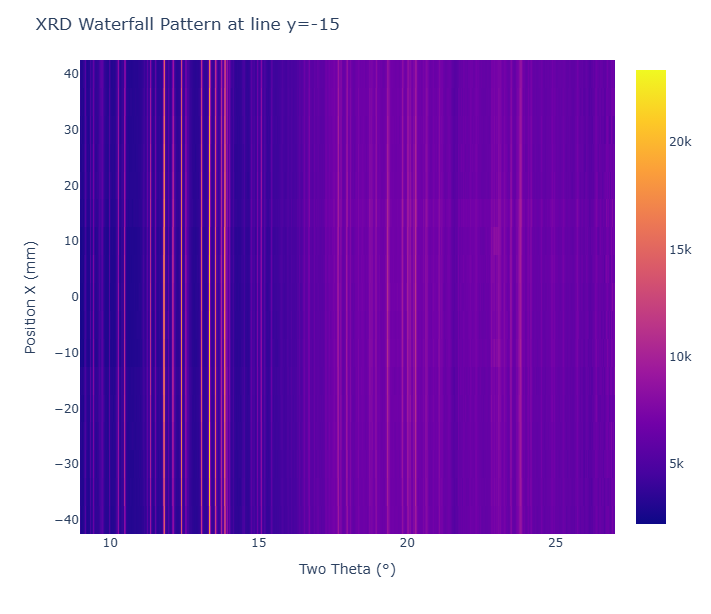

In [27]:
# Waterfall pattern
import plotly.express as px

angle = all_scans["XRD"]["angle"].sel(x=-15, y=-30).values
intensity = all_scans["XRD"]["intensity"].sel(x=0).values
positions = all_scans["XRD"]["intensity"].sel(x=0).coords["y"] # Change to "y" if you plot at x fixed

fig = px.imshow(intensity, x=angle, y=positions, aspect="auto", color_continuous_scale='plasma')
fig.update_layout(title="XRD Waterfall Pattern at line y=-15", xaxis_title="Two Theta (°)", yaxis_title="Position X (mm)", width=800, height=600)
fig.update_yaxes(autorange=True)

fig.show()

### **4. Data export to HDF5 and other formats**

##### **4.1 Simplified HDF5 dataset for Machine Learning**

A simplified HDF5 dataset can be created from a full HDF5 dataset using the function `create_simplified_dataset()`. This will create a new dataset with a structure that is different from the default format, making it easier to use for ML.

Part of the data will be copied and restructured as an hdf5 file containing 289 groups, one group for each position. In each group, datasets of different measurements will be directly created regardless of what instrument measured the data.

<span style="color: red;">Disclamer: The simplified HDF5 file can not be read by the current version of the reader since the structure is very different from the original file.</span>

In [28]:
import packages.readers.read_hdf5 as read_hdf5
import pathlib

# Filepath for the HDF5 files
foldername = None
# HDF5_path = pathlib.Path(f"/Users/williamrigaut/Desktop/combinatorials/combinatorials-data/{foldername}.hdf5")
HDF5_path = pathlib.Path("./datasets/NdCeFeB_2-5.hdf5")
#HDF5_simplified_path = pathlib.Path(f"/Users/williamrigaut/Desktop/combinatorials/combinatorials-data/{foldername}_simplified.hdf5")
HDF5_path = pathlib.Path("./datasets/NdCeFeB_2-5_simplified.hdf5")

# read_hdf5.create_simplified_dataset(HDF5_path, HDF5_simplified_path) # Will return the datatypes found inside the default hdf5 file


### **Appendix A. CHADA Tables and Diagrams for High Throughput Experiments at Néel Institut**

#### **A.1 CHADA Diagrams**

CHADA Diagrams are used to describe the flowchart of an experiment with a simple skematic. Each step is described with a short explanation and a color:

- RED: Indicates what type of sample was used to start the experiment.

- BLUE: Shows what needs to be done during the experiment to obtain the measured data.

- DARK GREEN: Raw data measured directly from the experiment.

- LIGHT GREEN: Treated data, usually extracted for the raw data using a software or a python code.

- DARK BLUE CONTOUR: Final treated data, is the content that you obtain from the `get_full_dataset()` command.

##### **CHADA Diagram for EDX (click left to display):**

![EDX Diagram](examples/EDX.svg)

##### **CHADA Diagram for MOKE:**

![MOKE Diagram](examples/MOKE.svg)

##### **CHADA Diagram for XRD:**

![XRD Diagram](examples/XRD.svg)

#### **A.2 CHADA Tables**
CHADA Tables are used to describe in details each experiment with a longer description that diagrams. Each important point about the experiment is described in a few lines. The color code is the same as for CHADA Tables.

##### **CHADA Table for EDX:**

![EDX Table](examples/CHADA_TABLES_EDX.svg)

##### **CHADA Table for MOKE:**

![MOKE Table](examples/CHADA_TABLES_MOKE.svg)

##### **CHADA Table for XRD:**

![XRD Table](examples/CHADA_TABLES_XRD.svg)

### **@end-of-notebook**